# Exploratory Data Analysis


In [1]:
import pandas as pd
import numpy as np
from random import shuffle
import random

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS


import re
import os
from tqdm.notebook import tqdm
from collections import Counter


import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
tweet = pd.read_csv("train.csv")

In [3]:
tweet.head(5)

,id,keyword,place,tweet,disaster
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


The id column is an unique identifier for each tweet, we are going to drop it.

In [4]:
tweet.drop(["id"], axis = 1, inplace = True)

In [5]:
tweet.shape

(7613, 4)

In [6]:
tweet.isna().sum()

keyword       61
place       2533
tweet          0
disaster       0
dtype: int64

<Axes: >

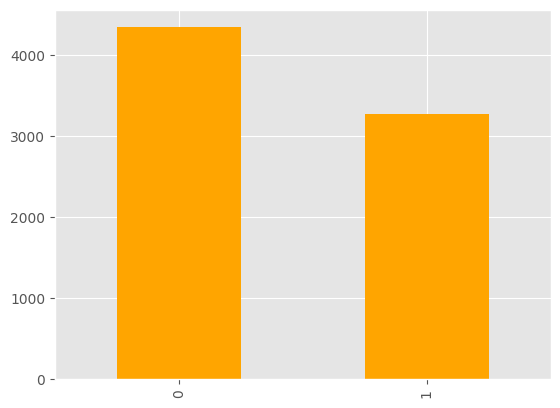

In [8]:
tweet.disaster.value_counts().plot(kind = "bar", color = "orange")

## Analysis of the "text" column

In [13]:
def print_random(data=None, count=5):
    done = []
    index = np.random.randint(low=0, high=tweet.shape[0])
    for i in range(0, count+1):
        index = np.random.randint(low=0, high=tweet.shape[0])
        if index not in done:
            print(data["tweet"].iloc[index])
            print("class: {}".format(data["disaster"].iloc[index]))
            print(70*"=")
            print("\n")
        else:
            data.append(index)

In [14]:
print_random(data=tweet, count=15)

Trauma injuries involving kids and sport usually cycling related: Director Trauma NS  http://t.co/8DdijZyNkf #NS http://t.co/52Uus4TFN3
class: 1


S3XLEAK!!!
Ph0tos of 19yrs old Ash@wo lady in Festac town from Delta exp0sed on BBM 5 leaked pictures... http://t.co/ixREhM05yq
class: 0


Loan Upheaval Is The Way In Which Oneself Can Save Your House Leaving out Being Foreclosed On...TEJc
class: 0


Sitting around a fire sounds great right about now
class: 0


@ShipsXAnchors IDEK HOW IS  THERE PEOPLE WHO ACTUALLY THINK HE'S A TERRORIST
class: 0


The Whirlwind! Scourge of Europe! RT @whedonesque Or you could just watch the Fanged Four http://t.co/Q0JHDcU6Ly
class: 0


Typhoon Soudelor: When will it hit Taiwan ÛÒ and how bad will it be? #GeneralNews http://t.co/cWZHgEzAJ4
class: 1


#Japan marks 70th anniversary of #Hiroshima atomic bombing (from @AP) http://t.co/qREInWg0GS
class: 1


Plains All American Pipeline company may have spilled 40% more crude oil than previously estimated #KSBYNew

In [15]:
print_random(data=tweet, count=5)

We are totally unprepared for an EMP attack. Both China Russia and probably Isis possess them. 90% fatalities. Why are we pushing them?
class: 1


I feel that 'crash and burn' by Thomas Rhett for sure
class: 0


Lab today ready for these body bags. ??
class: 0


#TornadoGiveaway åÊ #thebookclub åÊ Join in!! http://t.co/LjOMCTUZFy https://t.co/2zGVSLOX5p
class: 0


am boy @Crash_______  https://t.co/f5Ylp7pfN7
class: 0


Zouma has just flattened him there ?? #CFC
class: 0




In [18]:
dis_words = " ".join(tweet[tweet["disaster"] == 1]["tweet"])
dis_count = Counter(dis_words.split())

norm_words = " ".join(tweet[tweet["disaster"] == 0]["tweet"])
norm_count = Counter(norm_words.split())

In [19]:
norm_count.most_common(40)

[('the', 1524),
 ('a', 1115),
 ('to', 1099),
 ('I', 938),
 ('and', 840),
 ('of', 834),
 ('in', 720),
 ('you', 529),
 ('is', 512),
 ('for', 452),
 ('my', 442),
 ('on', 387),
 ('-', 374),
 ('with', 349),
 ('that', 326),
 ('The', 295),
 ('it', 290),
 ('be', 268),
 ('like', 233),
 ('this', 225),
 ('by', 225),
 ('have', 219),
 ('at', 212),
 ('was', 205),
 ('your', 201),
 ('me', 195),
 ('are', 195),
 ('just', 193),
 ('so', 190),
 ('&amp;', 190),
 ("I'm", 185),
 ('??', 183),
 ('but', 177),
 ('out', 172),
 ('up', 167),
 ('from', 166),
 ('not', 162),
 ('will', 146),
 ('as', 143),
 ('get', 142)]

In [20]:
# most occured words in dis tweets
dis_count.most_common(40)

[('the', 1051),
 ('in', 1037),
 ('of', 888),
 ('a', 730),
 ('to', 706),
 ('and', 462),
 ('-', 389),
 ('on', 386),
 ('for', 368),
 ('is', 302),
 ('at', 273),
 ('I', 259),
 ('The', 257),
 ('by', 244),
 ('from', 206),
 ('A', 167),
 ('that', 166),
 ('with', 159),
 ('was', 158),
 ('are', 150),
 ('it', 143),
 ('after', 140),
 ('as', 139),
 ('have', 134),
 ('via', 115),
 ('this', 110),
 ('fire', 108),
 ('my', 107),
 ('over', 107),
 ('...', 106),
 ('&amp;', 105),
 ('you', 103),
 ('be', 103),
 ('has', 98),
 ('been', 93),
 ('In', 90),
 ('who', 89),
 ('California', 86),
 ('killed', 86),
 ('like', 85)]

In [21]:
def show_viz(count=50, target=None):
    lst = []
    if target == "normal":
        for w, n in norm_count.most_common(count):
            lst.append([w,n])
        df = pd.DataFrame(data=lst)
        df.columns = ["word", "count"]
        df.plot(kind="bar",
                 x="word",
                 y="count",
                 title=f"{count} Most common words in {target} tweets",
                figsize=(12,8),
               color = list('rgbkymc'),)
        plt.xlabel('Words')
        plt.ylabel("Count")


    elif target == "disaster":
        for w, n in dis_count.most_common(count):
            lst.append([w,n])
        df = pd.DataFrame(data=lst)

        df.columns = ["word", "count"]
        df.plot(kind="bar",
                 x="word",
                 y="count",
                 title=f"{count} Most common words in {target} tweets",
               figsize=(12,8),
               color = list('rgbkymc'),)
        plt.xlabel('Words')
        plt.ylabel("Count")


In [122]:
# We want to not see the stop words at all
stopwords = set(STOPWORDS)

# Plotting the word cloud od disaster tweets
wordcloud = WordCloud(width = 1500, height = 1200,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(dis_words)


In [123]:
# We want to not see the stop words at all
stopwords = set(STOPWORDS)

# Plotting the word cloud od disaster tweets
wordcloud = WordCloud(width = 1500, height = 1200,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(norm_words)

## Analysis of the "location" column

In [27]:
tweet.head(5)

,keyword,place,tweet,disaster
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [29]:
# Total NAN values
tweet["place"].isna().sum()

2533

In [31]:
total_con = len(tweet.place.value_counts())
print(f"There is all total {total_con} number of unique countries available.")

There is all total 3341 number of unique countries available.


In [34]:
normal_tweet_location = tweet[tweet["disaster"] == 0][["place", "disaster"]]["place"].value_counts(dropna = False)
disaster_tweet_location = tweet[tweet["disaster"] == 1][["place", "disaster"]]["place"].value_counts(dropna = False)


In [35]:
normal_tweet_location_df = normal_tweet_location.to_frame().reset_index()
normal_tweet_location_df.columns = ["country", "count"]
disaster_tweet_location_df = disaster_tweet_location.to_frame().reset_index()
disaster_tweet_location_df.columns = ["country", "count"]


In [36]:
normal_tweet_location_df = normal_tweet_location_df.sort_values(by = ["count"],
                                                                ascending = False,
                                                                kind='quicksort',
                                                                na_position='last')

disaster_tweet_location_df = disaster_tweet_location_df.sort_values(by = ["count"],
                                                                ascending = False,
                                                                kind='quicksort',
                                                                na_position='last')

In [37]:
normal_tweet_location_df.head(5)

,country,count
0,NaN,1458
1,New York,55
2,USA,37
3,London,29
4,United States,23


In [38]:
disaster_tweet_location_df.head(5)

,country,count
0,NaN,1075
1,USA,67
2,United States,27
3,Nigeria,22
4,India,20


In [39]:


def location_viz(low = 0, high = 50, target = None):
    if target == "normal":
        count_dataframe = normal_tweet_location_df[normal_tweet_location_df["count"].apply(lambda x: high >= x >=low)]


        count_dataframe.plot(kind = "bar",
        x = "country",
        y = "count",
        color="blue",
        title=f"Range: {high}-{low}, {target} Tweets",
        figsize = (12, 8),
        )
        plt.xlabel("Country")
        plt.ylabel("Count")

    elif target == "disaster":
        count_dataframe = disaster_tweet_location_df[disaster_tweet_location_df["count"].apply(lambda x: high >=x >=low)]


        count_dataframe.plot(kind = "bar",
        x = "country",
        y = "count",
        color="red",
        title=f"Range: {high}-{low}, {target} Tweets",
                            figsize = (12, 8),)
        plt.xlabel("Country")
        plt.ylabel("Count")

## Analysis of the "Keyword" column

In [44]:
tweet.head(5)

,keyword,place,tweet,disaster
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [45]:
total = tweet["keyword"].isnull().sum()
print(f"There are all total {total} NAN values available in keyword column")

There are all total 61 NAN values available in keyword column


In [50]:
normal_tweet_kw = tweet[tweet.disaster == 0][["keyword"]]
normal_tweet_kw = normal_tweet_kw.keyword.value_counts(dropna = False).to_frame().reset_index()
normal_tweet_kw.columns = ["keyword", "count"]


disaster_tweet_kw = tweet[tweet.disaster == 1][["keyword"]]
disaster_tweet_kw = disaster_tweet_kw.keyword.value_counts(dropna = False).to_frame().reset_index()
disaster_tweet_kw.columns = ["keyword", "count"]

In [51]:
normal_tweet_kw.head(5)

,keyword,count
0,body%20bags,40
1,harm,37
2,armageddon,37
3,deluge,36
4,ruin,36


In [52]:
disaster_tweet_kw.head(5)

,keyword,count
0,NaN,42
1,wreckage,39
2,outbreak,39
3,derailment,39
4,typhoon,37


In [53]:
normal_tweet_lkw = normal_tweet_kw.sort_values(by = ["count"],
                                                    ascending = False,
                                                    kind='quicksort',
                                                    na_position='last')


disaster_tweet_lkw = disaster_tweet_kw.sort_values(by = ["count"],
                                                    ascending = False,
                                                    kind='quicksort',
                                                    na_position='last')

# Data Cleaning and Preprocessing

In [56]:
tweet.head(5)

,keyword,place,tweet,disaster
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [57]:
print_random(data=tweet, count=5)

@spinningbot Are you another Stand-user? If you are I will have to detonate you with my Killer Queen.
class: 0


Uhhhhh demon hunters. But not the whole Burning Crusade v 2.0 thing.  https://t.co/oPtpS1lgKC
class: 0


Got it winning by a landslide those the perfect words cause I got it out the mud.....
class: 0


Wildfire near Columbia River town is 50 percent contained http://t.co/gzGpWSqyMW #FireNews #WA http://t.co/ay49MTYyL8
class: 1


@imSUSHIckoflove @alekalicante RIGHT?? Yep you're a witness to his injuries HAHA it's a gauze!
class: 0


Attention all RCHS football players there will be coffins and body bags by the locker rooms grab one tommorow because were gonna die
class: 0




In [60]:
# Tqdm just gives us the status bar
from tqdm.notebook import tqdm
# Imporing Porter Stemmer
from nltk.stem import PorterStemmer
count = 0
# Initializing the stemmer
ps = PorterStemmer()

# Stopwords
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

def decontracted(phrase):
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"dont", "do not", phrase)
    phrase = re.sub(r"prolly", "probably", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    phrase = re.sub(r"(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9-_]+)", " ", phrase) # removes usernames
    phrase = re.sub(r"^(\+\d{1,2}\s)?\(?\d{3}\)?[\s.-]\d{3}[\s.-]\d{4}$", " ", phrase)  # removes phone numbers
    return phrase

for sentance in tqdm(tweet['tweet'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(ps.stem(e.lower()) for e in sentance.split() if e.lower() not in stopwords)
    sentance.replace("#", "").replace("_", " ")
    tweet["tweet"][count] = sentance.strip()
    count += 1

  0%|          | 0/7613 [00:00<?, ?it/s]

In [61]:
# printing some tweets after cleaning and stemming
print_random(data = tweet, count = 15)

japan nuke program albeit unsuccess casualti estim ground war ten million
class: 1


truth news bbc cnn islam truth god isi terror quran lie
class: 0


ice age meltdown
class: 0


ir icemoon aftershock dubstep trapmus dnb edm danc ice
class: 0


game offici collaps
class: 0


rubber mudslid still laugh
class: 0


turn radio stoponesound live airwav amp fm blaze hit
class: 0


loui vuitton cultsierr monogram shoulder bag cross bodi bag
class: 0


drunk meal cook total obliter
class: 1


wwi wwii japanes armi navi militari japan leather watch war mido full read ebay
class: 0


stuart broad take eight joe root run riot aussi stuart broad took career best figur
class: 0


remind mass murder white supremacist ander breivik also unsurprisingli anti feminist
class: 1


play boat club memori london burn web radio
class: 0


tomorrow announc vod
class: 0


cut celebreti post wound onlin no go
class: 0


last second ebay bid rt shaolin rescuer dvd shen chan nan chiang five venom kung fu pleas fa

In [62]:
print_random(data = tweet, count = 20)

angel histori propel futur wind progress leav wake pile death destruct wb
class: 0


rli tragedi mp live recount horror saw coach train plung water call
class: 1


today trauma top trauma top trauma richmond know work go crazi next two day
class: 0


pic old pkk suicid bomber deton bomb turkey armi trench releas
class: 1


colt get demolish patriot like whine integr cantmakeitup patriotsn
class: 0


drunk meal cook total obliter
class: 0


discov listen buy riot blowmandyup
class: 0


spot flood combo curv cree led work light bar offroad fog lamp full
class: 0


go nuclear arm race go make rubbl bounc winston churchil
class: 0


guess say might one thing common biolog father made way weapon
class: 0


babi girl rescu coastguard float half mile sea socialnew
class: 1


strang loud impact bang nois train epsom arriv wimbledon
class: 0


might buy esoter weapon astrologian
class: 0


truth news bbc cnn islam truth god isi terror quran lie
class: 0


u record hurrican drought
class: 1


cl

In [63]:
tweet.tail(5)

,keyword,place,tweet,disaster
7608,NaN,NaN,two giant crane hold bridg collaps nearbi home,1
7609,NaN,NaN,control wild fire california even northern par...,1
7610,NaN,NaN,volcano hawaii,1
7611,NaN,NaN,polic investig e bike collid car littl portug ...,1
7612,NaN,NaN,latest home raze northern california wildfir a...,1


# Feature Engineering and Dimensionality Reduction (TNSE application)

In [64]:
tweet.head(5)

,keyword,place,tweet,disaster
0,NaN,NaN,deed reason earthquak may allah forgiv us,1
1,NaN,NaN,forest fire near la rong sask canada,1
2,NaN,NaN,resid ask ishelt place notifi offic no evacu s...,1
3,NaN,NaN,peopl receiv wildfir evacu order california,1
4,NaN,NaN,got sent photo rubi alaska smoke wildfir pour ...,1


In [66]:
location_count = tweet["place"].value_counts().to_dict()

keyword_count = tweet["place"].value_counts().to_dict()

In [67]:
count = 0
for k in tweet["keyword"]:
    if k is str:
        tweet["keyword"][count] = keyword_count[k]
    else:
        tweet["keyword"][count] = 0
    count += 1

In [69]:
count = 0
for k in tweet["place"]:
    if k is str:
        tweet["place"][count] = location_count[k]
    else:
        tweet["place"][count] = 0
    count += 1

In [70]:
tweet.head(5)

,keyword,place,tweet,disaster
0,0,0,deed reason earthquak may allah forgiv us,1
1,0,0,forest fire near la rong sask canada,1
2,0,0,resid ask ishelt place notifi offic no evacu s...,1
3,0,0,peopl receiv wildfir evacu order california,1
4,0,0,got sent photo rubi alaska smoke wildfir pour ...,1


In [71]:
tweet.to_csv('cleaned_tweets.csv')

In [73]:
X_df = tweet.drop(["disaster"],axis = 1)
y_df = tweet["disaster"]

In [74]:
X_df.head(5)

,keyword,place,tweet
0,0,0,deed reason earthquak may allah forgiv us
1,0,0,forest fire near la rong sask canada
2,0,0,resid ask ishelt place notifi offic no evacu s...
3,0,0,peopl receiv wildfir evacu order california
4,0,0,got sent photo rubi alaska smoke wildfir pour ...


In [75]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_oversampled, y_oversampled = ros.fit_resample(X_df, y_df)

<Axes: >

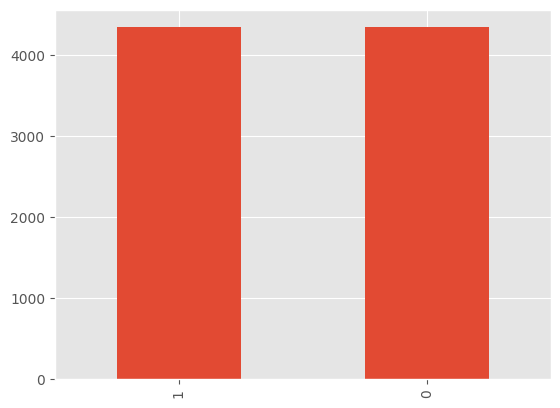

In [76]:
y_oversampled.value_counts().plot(kind = "bar")


In [77]:
X_oversampled.head(5)

,keyword,place,tweet
0,0,0,deed reason earthquak may allah forgiv us
1,0,0,forest fire near la rong sask canada
2,0,0,resid ask ishelt place notifi offic no evacu s...
3,0,0,peopl receiv wildfir evacu order california
4,0,0,got sent photo rubi alaska smoke wildfir pour ...


In [78]:
y_oversampled.head(5)

0    1
1    1
2    1
3    1
4    1
Name: disaster, dtype: int64

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range = (1, 3))
X= vectorizer.fit_transform(X_oversampled["tweet"].values.ravel())

In [81]:
X.shape

(8684, 95079)

In [82]:
y = y_oversampled

In [83]:
y.shape

(8684,)

In [84]:
type(X)

scipy.sparse._csr.csr_matrix

In [85]:
# Dimensionality reduction
from sklearn.manifold import TSNE
def show_Tsne(perplexity = None, x = None, y = None):
    X_embedded = TSNE(n_components=2, perplexity=perplexity,n_iter=1500,n_jobs=-1).fit_transform(X)
    embedded = pd.DataFrame(X_embedded)
    embedded.columns = ["f1", "f2"]
    embedded["class"] = y
    def change(x):
        if x == 1:
            return "Disaster"
        else:
            return "Normal"

    embedded["class"] = embedded["class"].apply(change)
    plt.figure(figsize = (12, 8))
    sns.scatterplot(x="f1", y="f2", hue="class", data = embedded)

In [88]:
# T-SNe with perplexity 30
show_Tsne(perplexity= 30, x = X, y = y)

TypeError: PCA initialization is currently not supported with the sparse input matrix. Use init="random" instead.

In [89]:
# T-SNE with perplexity 25
show_Tsne(perplexity= 25, x = X, y = y)

TypeError: PCA initialization is currently not supported with the sparse input matrix. Use init="random" instead.

In [90]:
# Splitting the dataset into train and test, we are using 20% data for testing.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [91]:
# the sparse matrix which represents the text data
type(X_train)

scipy.sparse._csr.csr_matrix

# Modelling

In [92]:
# Logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


C_vals = [10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4]

for num in C_vals:
    clf = LogisticRegression(C=num, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5050,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

    clf.fit(X_train, y_train)
    predicted = clf.predict(X_test)
    f1 = f1_score(y_test, predicted)
    print(f"F1 score = {f1}")
    print("C value = {}".format(num))
    print("Train Accuracy = {}%".format(clf.score(X_train, y_train)*100))
    print("Test Accuracy = {}%".format(clf.score(X_test, y_test)*100))
    print(70*"=")

F1 score = 0.0
C value = 0.0001
Train Accuracy = 50.15114437886857%
Test Accuracy = 49.395509499136445%
F1 score = 0.16684045881126172
C value = 0.001
Train Accuracy = 55.57794731538793%
Test Accuracy = 54.00115141047783%
F1 score = 0.6521739130434783
C value = 0.01
Train Accuracy = 80.62473009932344%
Test Accuracy = 73.28727691421992%
F1 score = 0.7716535433070866
C value = 0.1
Train Accuracy = 88.15315963725348%
Test Accuracy = 79.96545768566494%
F1 score = 0.813953488372093
C value = 1
Train Accuracy = 95.00503814596229%
Test Accuracy = 82.4985607369027%
F1 score = 0.8365155131264917
C value = 10
Train Accuracy = 98.35900388656974%
Test Accuracy = 84.22567645365572%
F1 score = 0.8339307048984469
C value = 100
Train Accuracy = 98.56052972506117%
Test Accuracy = 83.99539435808866%
F1 score = 0.8320382546323969
C value = 1000
Train Accuracy = 98.56052972506117%
Test Accuracy = 83.82268278641337%
F1 score = 0.827212522576761
C value = 10000
Train Accuracy = 98.56052972506117%
Test Accur

In [93]:
# 10 is the best hyperparameter
clf = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5050,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

clf.fit(X_train, y_train)
print(f"F1 score = {f1}")
print("C value = {}".format(num))
print("Train Accuracy = {}%".format(clf.score(X_train, y_train)*100))
print("Test Accuracy = {}%".format(clf.score(X_test, y_test)*100))

F1 score = 0.827212522576761
C value = 10000
Train Accuracy = 98.35900388656974%
Test Accuracy = 84.22567645365572%


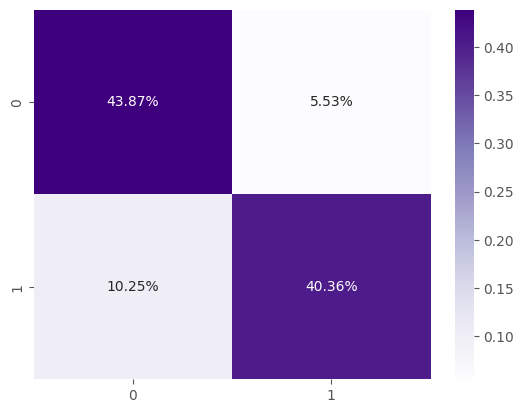

In [94]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Purples');

In [95]:
# saving the model
from joblib import dump

# saving the model
dump(clf, "disaster.pkl")

['disaster.pkl']

In [96]:
# tesing
text = ["""

Is it good?

"""]
feature_representation = vectorizer.transform(text).toarray()
if clf.predict(feature_representation) == 1:
    prob = "{0:.2f}".format(clf.predict_proba(feature_representation)[0][1]*100)
    print("Disaster tweet! {}%".format(prob))
else:
    prob = "{0:.2f}".format(clf.predict_proba(feature_representation)[0][0]*100)
    print("Normal tweet! {}%".format(prob))

Normal tweet! 91.38%


# Testing our model on text data

In [99]:
# loading the test data
test = pd.read_csv("test.csv")
test.drop(["keyword", "place", "id"], axis = 1, inplace = True)

In [100]:
# peaking into the data
test.head(5)

,tweet
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, s..."
2,"there is a forest fire at spot pond, geese are..."
3,Apocalypse lighting. #Spokane #wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan


In [104]:
# we need to preprocess the test data as well

count = 0
for sentance in tqdm(test['tweet'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(ps.stem(e.lower()) for e in sentance.split() if e.lower() not in stopwords)
    sentance.replace("#", "").replace("_", " ")
    test["tweet"][count] = sentance.strip()
    count += 1


  0%|          | 0/3263 [00:00<?, ?it/s]

In [105]:
test.tail(10)

,tweet
3253,malaysian pm confirm debri miss flight
3254,offici alabama home quarantin possibl ebola ca...
3255,see old pkk suicid bomber deton bomb turkey ar...
3256,confer attende blue line airport derail pleas ...
3257,death toll suicid car bomb ypg posit villag ra...
3258,earthquak safeti lo angel safeti fasten xrwn
3259,storm ri wors last hurrican hardest hit yard l...
3260,green line derail chicago
3261,meg issu hazard weather outlook hwo
3262,cityofcalgari activ municip emerg plan yycstorm


In [109]:
test_input = test["tweet"].values
print(X_test)

  (0, 28695)	0.2131928214950144
  (0, 30642)	0.2131928214950144
  (0, 44456)	0.2131928214950144
  (0, 57947)	0.2131928214950144
  (0, 4227)	0.2131928214950144
  (0, 5567)	0.23628366955148702
  (0, 62163)	0.23628366955148702
  (0, 94234)	0.2131928214950144
  (0, 28694)	0.2131928214950144
  (0, 30641)	0.2131928214950144
  (0, 44455)	0.2131928214950144
  (0, 4226)	0.2131928214950144
  (0, 5566)	0.23628366955148702
  (0, 62162)	0.23628366955148702
  (0, 94233)	0.2131928214950144
  (0, 4203)	0.16208277379384495
  (0, 5565)	0.23628366955148702
  (0, 62159)	0.2131928214950144
  (0, 57945)	0.20859825426989598
  (0, 44397)	0.11794472266531975
  (0, 30640)	0.16641346058693615
  (0, 57450)	0.0864569834031319
  (0, 28663)	0.17069497594785152
  (0, 67816)	0.16563800398784306
  (1, 13589)	0.2317012352883199
  :	:
  (1736, 82164)	0.18936667827910364
  (1736, 54774)	0.18936667827910364
  (1736, 5021)	0.18936667827910364
  (1736, 14727)	0.18936667827910364
  (1736, 61394)	0.18936667827910364
  (1736, 8

In [110]:
# applying the same TF-IDF
X_test = vectorizer.transform(test_input).toarray()

In [111]:

X_test.shape

(3263, 95079)

In [112]:
predicted = []
for i in clf.predict(X_test):
    predicted.append(i)

In [115]:
new = pd.read_csv("test.csv")
new.drop(["keyword", "place", "id"], axis = 1, inplace = True)
new["preprocessed_test"] = test.tweet
new["predicted"] = predicted


In [ ]:
new.head(70)

,text,preprocessed_test,predicted
0,Just happened a terrible car crash,happen terribl car crash,1
1,"Heard about #earthquake is different cities, s...",heard earthquak differ citi stay safe everyon,1
2,"there is a forest fire at spot pond, geese are...",forest fire spot pond gees flee across street ...,1
3,Apocalypse lighting. #Spokane #wildfires,apocalyps light spokan wildfir,1
4,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan,1
...,...,...,...
65,Horrible Accident Man Died In Wings of Airpla...,horribl accid man die wing,1
66,@god if an accident were to happen on this air...,accid happen airplan idc rest luggag complet d...,0
67,Horrible Accident Man Died In Wings of Airplan...,horribl accid man die wing airplan,1
68,#UPDATE: Picture from the Penn Twp. airplane a...,updat pictur penn twp airplan accid,1


In [116]:
# saving the dataframe as an excel file
new.to_excel("predicted_test.xlsx")

In [121]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score
import joblib
def load_model(model_path):
    # Load the pre-trained model
    loaded_model = joblib.load(model_path)
    return loaded_model

def preprocess_data(data):
    # Preprocess the data
    count = 0
    for sentance in tqdm(data['tweet'].values):
        sentance = re.sub(r"http\S+", "", sentance)
        sentance = decontracted(sentance)
        sentance = re.sub("\S*\d\S*", "", sentance).strip()
        sentance = re.sub('[^A-Za-z]+', ' ', sentance)
        sentance = ' '.join(ps.stem(e.lower()) for e in sentance.split() if e.lower() not in stopwords)
        sentance.replace("#", "").replace("_", " ")
        data["tweet"][count] = sentance.strip()
        count += 1

    # Transform text data to TF-IDF representation
    X = vectorizer.transform(data["tweet"].values).toarray()
    return X

def preprocess_and_predict(model_path, testing_data):
    # Load the pre-trained model
    loaded_model = load_model(model_path)

    # Preprocess the testing data
    X_test = preprocess_data(testing_data)

    # Make predictions using the loaded model
    predictions = loaded_model.predict(X_test)

    return predictions

def evaluate_model(model_path, testing_data):
    # Preprocessing the data to separate features and target
    X_test = preprocess_data(testing_data)

    # Load the pre-trained model
    loaded_model = load_model(model_path)

    # Make predictions
    predictions = loaded_model.predict(X_test)

    # Get the true labels from the testing data
    y_true = testing_data['disaster']

    # Calculate and print the F1 score and accuracy
    f1 = f1_score(y_true, predictions)
    acc = accuracy_score(y_true, predictions)
    print(f'F1 Score: {f1}')
    print(f'Accuracy: {acc}')

    return f1, acc

# Example usage
if __name__ == "__main__":
    # Load your testing dataset
    train_data = pd.read_csv('train.csv')
    test_data = pd.read_csv('test.csv')

    # Assuming your model is saved as 'disaster.pkl' and vectorizer is defined
    model_path = 'disaster.pkl'

    # Evaluate the model on the training data
    print("Evaluation on training data:")
    evaluate_model(model_path, train_data)

    # Make predictions on the test data
    print("Making predictions on test data:")
    test_data['predicted'] = preprocess_and_predict(model_path, test_data)

    # Save the predicted data to a CSV file
    test_data.to_csv('predicted.csv', index=False)

Evaluation on training data:


  0%|          | 0/7613 [00:00<?, ?it/s]

F1 Score: 0.946376139700201
Accuracy: 0.9544200709313018
Making predictions on test data:


  0%|          | 0/3263 [00:00<?, ?it/s]